In [3143]:
# import packages 导入库，搭建环境
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
np.random.RandomState(42)
sns.set_theme()

# 英特尔加速扩展，需去掉
from sklearnex import patch_sklearn
patch_sklearn()

# ignore warnings 可以删除
import warnings
warnings.filterwarnings('ignore')

# 为了让matplotlib里显示中文字符
import matplotlib.font_manager as fm 
matplotlib.rcParams['font.family'] = 'Microsoft Yahei' # 设置字体
# matplotlib.rcParams['font.family'] = 'Heiti TC'

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3144]:
# data import 数据导入
df = pd.read_csv('老客户信息.csv')

In [3145]:
df.head().T

,0,1,2,3,4
客户ID,15889,15890,15892,15893,15894
雇员关系,员工家属,在职员工,员工家属,非员工,在职员工
性别,男,男,女,男,男
年龄层级,45-60岁,60-75岁,60-75岁,60-75岁,45-60岁
开户时长,245,246,246,246,246
客户状态,活跃客户,活跃客户,活跃客户,活跃客户,活跃客户
是否外国人,否,否,否,否,否
开户渠道,KAT,KAT,KAT,KAT,KAT
省份名称,北京,北京,北京,北京,北京
年收入,326124.9,71461.2,430477.41,430477.41,281757.72


In [3146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80824 entries, 0 to 80823
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   客户ID    80824 non-null  int64  
 1   雇员关系    80824 non-null  object 
 2   性别      80824 non-null  object 
 3   年龄层级    80824 non-null  object 
 4   开户时长    80824 non-null  int64  
 5   客户状态    80824 non-null  object 
 6   是否外国人   80824 non-null  object 
 7   开户渠道    80824 non-null  object 
 8   省份名称    80824 non-null  object 
 9   年收入     80824 non-null  float64
 10  客户等级    80824 non-null  object 
 11  金融衍生品   80824 non-null  int64  
 12  工资账户    80824 non-null  int64  
 13  高级个人账户  80824 non-null  int64  
 14  个人账户    80824 non-null  int64  
 15  尊享个人账户  80824 non-null  int64  
 16  短期存款    80824 non-null  int64  
 17  中期存款    80824 non-null  int64  
 18  长期存款    80824 non-null  int64  
 19  基金      80824 non-null  int64  
 20  抵押贷款    80824 non-null  int64  
 21  养老金     80824 non-null  int64  
 22

类别变量：雇员关系、性别、客户关系、是否外国人、开户渠道、省份名称、客户等级

In [3147]:
df.describe()

,客户ID,开户时长,年收入,金融衍生品,工资账户,高级个人账户,个人账户,尊享个人账户,短期存款,中期存款,长期存款,基金,抵押贷款,养老金,小额贷款,信用卡,证券
count,8.082400e+04,80824.000000,8.082400e+04,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000,80824.000000
mean,5.884578e+05,115.501769,1.472680e+05,0.001559,0.366178,0.059339,0.390466,0.124109,0.036511,0.005852,0.180070,0.070920,0.019833,0.037328,0.004875,0.241203,0.099339
std,4.600182e+05,76.298482,1.235813e+05,0.039453,0.481762,0.236259,0.487858,0.329708,0.187560,0.076276,0.384248,0.256692,0.139428,0.189566,0.069650,0.427816,0.299119
min,1.588900e+04,0.000000,5.651550e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.064635e+05,29.000000,8.235885e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.570135e+05,134.000000,1.215521e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.065310e+06,173.000000,1.795378e+05,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.454612e+06,246.000000,1.113990e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


观察到年收入一栏有显著离群值，故进行log变换；开户时长的单位是月，转换为年

In [3148]:
df['年收入log'] = np.log(df['年收入'])
df['开户时长'] = np.floor(df['开户时长'] / 12)

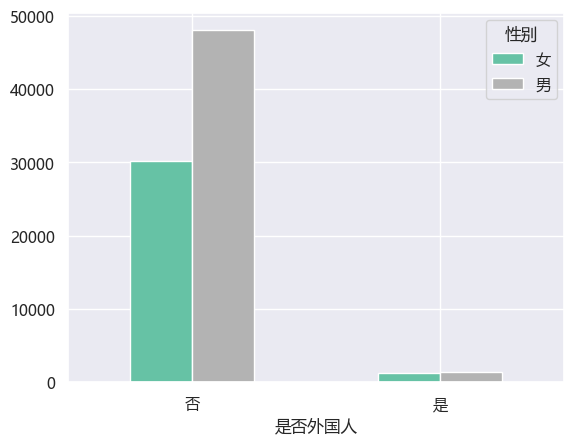

In [3149]:
df[['客户ID','性别', '是否外国人']]\
    .groupby(['性别', '是否外国人']).count().reset_index()\
    .pivot_table(values='客户ID', index='是否外国人', columns='性别')\
    .plot(kind='bar', colormap='Set2', )
plt.xticks(rotation=0);

In [3150]:
df['雇员关系'].value_counts()

非员工     80560
离职员工      101
在职员工       82
员工家属       81
Name: 雇员关系, dtype: int64

与银行有关的群体基数过小

<Axes: xlabel='年龄层级', ylabel='Count'>

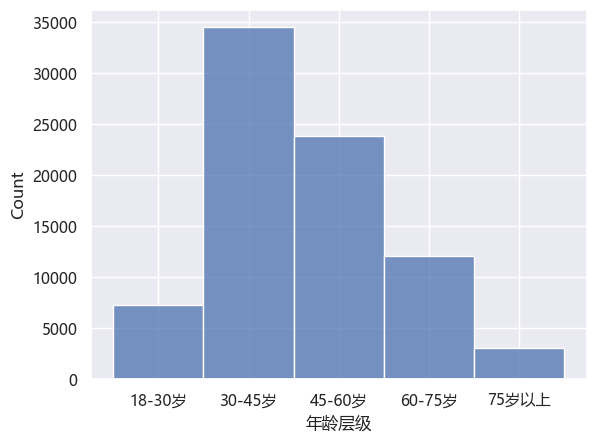

In [3151]:
df['年龄层级'] = pd.Categorical(df['年龄层级'], categories=['18-30岁', '30-45岁', '45-60岁', '60-75岁', '75岁以上'])
sns.histplot(df['年龄层级'], binwidth=1, palette="Set2")

<Axes: xlabel='开户时长', ylabel='Count'>

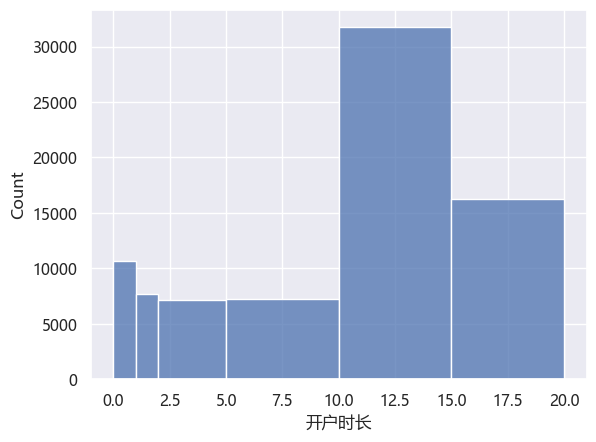

In [3152]:
sns.histplot(df['开户时长'], palette="Set2", bins=[0, 1, 2, 5, 10, 15, 20])

<Axes: xlabel='开户时长', ylabel='客户等级'>

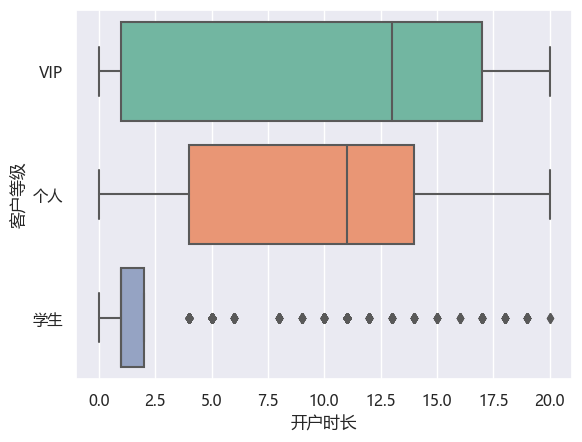

In [3153]:
sns.boxplot(data=df, x='开户时长', y='客户等级', palette="Set2")

In [3154]:
df = df.loc[~((df['客户等级'] == '学生') & (df['开户时长'] > 5))]

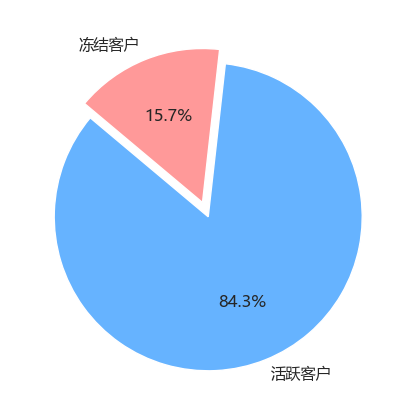

In [3155]:
# 计算不同客户状态的数量
type_counts = df['客户状态'].value_counts()

# 绘制饼图
labels = ['活跃客户', '冻结客户']
colors = ['#66b3ff','#ff9999']
explode = (0.1, 0)  

plt.figure(figsize=(7,5))
plt.pie(type_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.show()

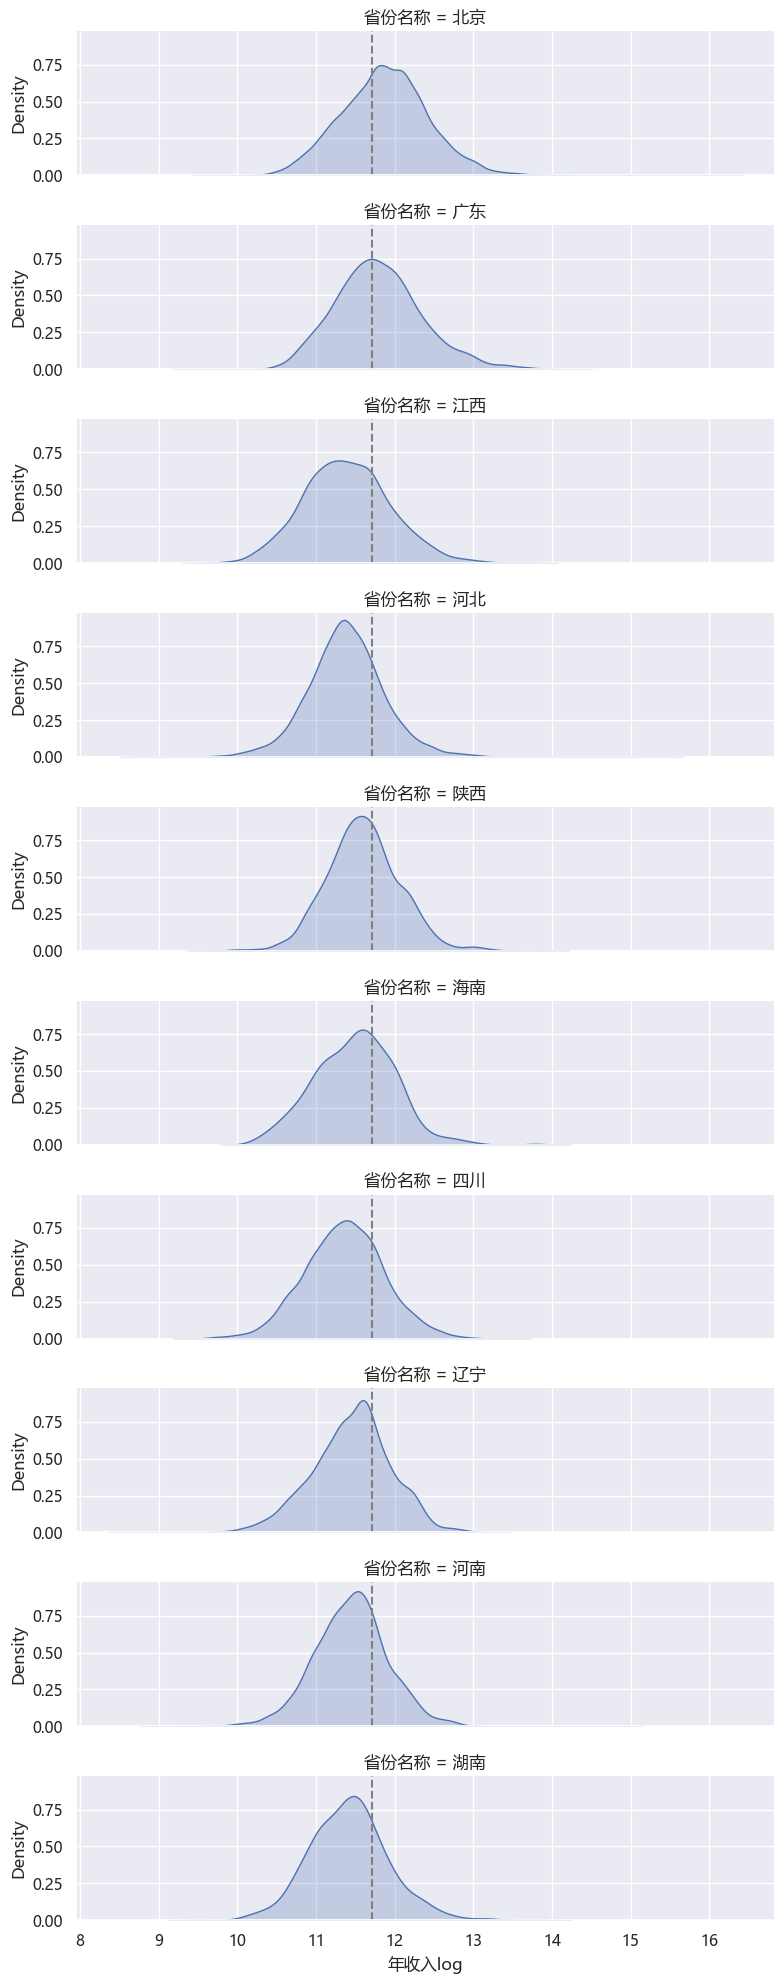

In [3156]:
s = sns.FacetGrid(df, row='省份名称', aspect=4, height=2)
s.map_dataframe(sns.kdeplot, x='年收入log', fill=True)
s.refline(x=df['年收入log'].mean())
s.tight_layout()

In [3157]:
print(df['开户渠道'].value_counts())
print(len(df['开户渠道'].unique()))
df.drop(columns='开户渠道', inplace=True)

KAT    33645
KFC    22078
KFA     4769
KHE     2954
KHK     2846
       ...  
KFV        1
KFL        1
KDG        1
KAV        1
KEC        1
Name: 开户渠道, Length: 127, dtype: int64
127


开户渠道数量过多，且存在不同渠道客户数量不平衡的情况，会对后期聚类操作造成不利影响，故删除

<Axes: xlabel='计数', ylabel='产品'>

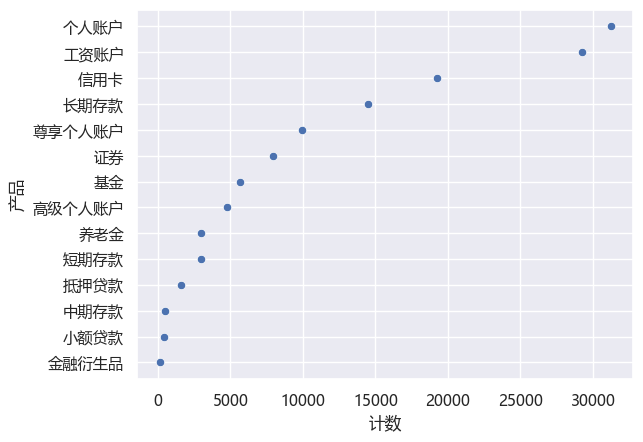

In [3158]:
product = df[['金融衍生品',
              '工资账户',
              '高级个人账户',
              '个人账户',
              '尊享个人账户',
              '短期存款',
              '中期存款',
              '长期存款',
              '基金',
              '抵押贷款',
              '养老金',
              '小额贷款',
              '信用卡',
              '证券']].sum().reset_index(name='计数')
product.sort_values(by='计数', ascending=False, inplace=True)
product.rename(columns={'index': '产品'}, inplace=True)
sns.scatterplot(data=product, y='产品', x='计数')

In [3159]:
personal = df[df['个人账户'] == 1]
payroll = df[df['工资账户'] == 1]
credit = df[df['信用卡'] == 1]

<Axes: xlabel='年龄层级', ylabel='Count'>

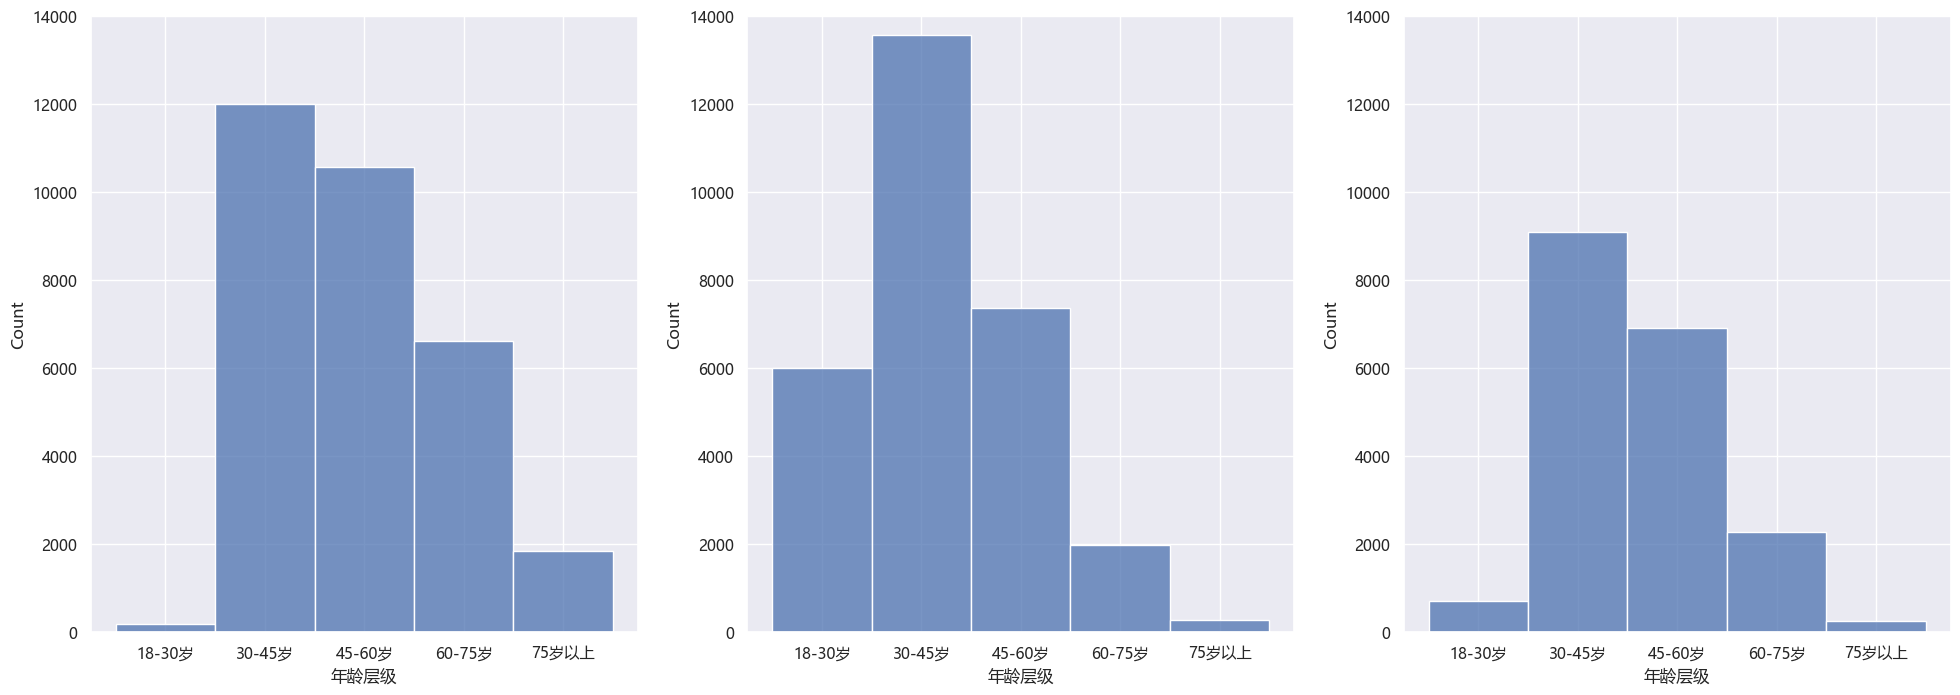

In [3160]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
for ax in axes:
    ax.set_ylim([0, 14000])
plt.subplot(1, 3, 1)
sns.histplot(personal['年龄层级'], binwidth=1, palette="Set2")
plt.subplot(1, 3, 2)
sns.histplot(payroll['年龄层级'], binwidth=1, palette="Set2")
plt.subplot(1, 3, 3)
sns.histplot(credit['年龄层级'], binwidth=1, palette="Set2")

<Axes: xlabel='客户等级', ylabel='count'>

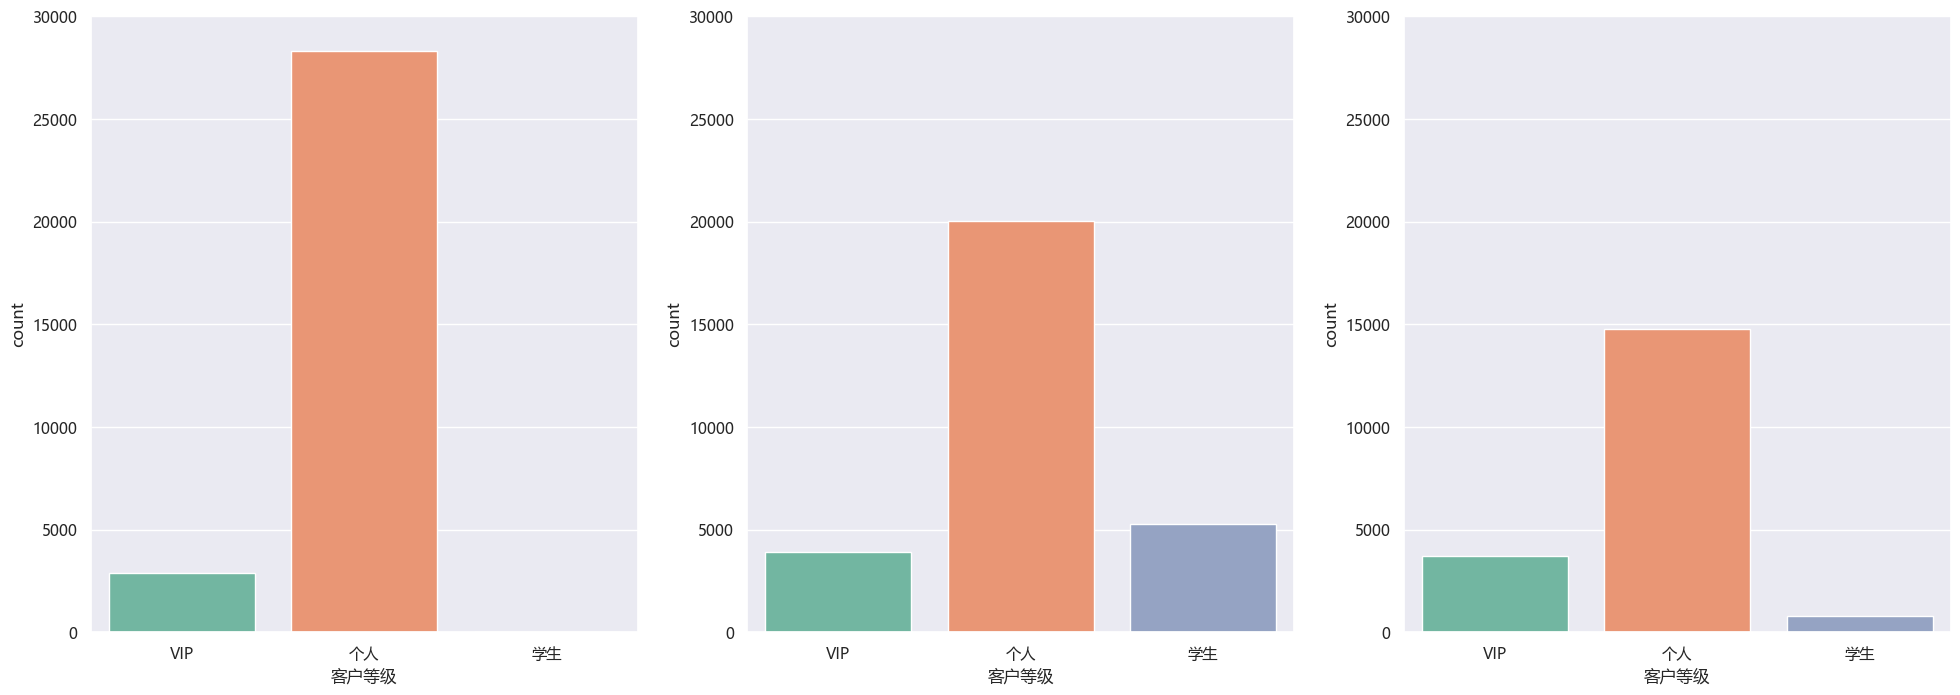

In [3161]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
for ax in axes:
    ax.set_ylim([0, 30000])
plt.subplot(1, 3, 1)
sns.countplot(data=personal, x='客户等级', order=['VIP', '个人', '学生'], palette="Set2")
plt.subplot(1, 3, 2)
sns.countplot(data=payroll, x='客户等级', order=['VIP', '个人', '学生'], palette="Set2")
plt.subplot(1, 3, 3)
sns.countplot(data=credit, x='客户等级', order=['VIP', '个人', '学生'], palette="Set2")

<Axes: xlabel='年收入log', ylabel='Density'>

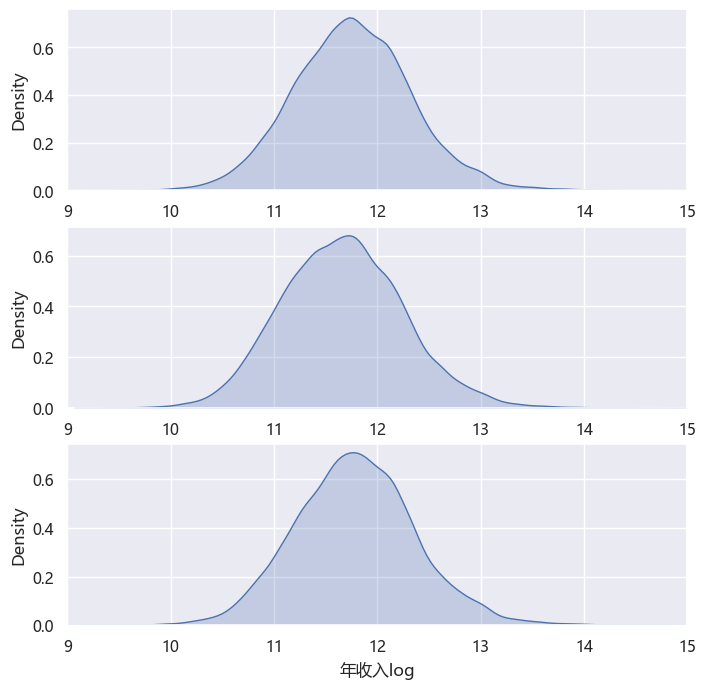

In [3162]:
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
for ax in axes:
    ax.set_xlim([9, 15])
plt.subplot(3, 1, 1)
sns.kdeplot(data=personal, x='年收入log', fill=True)
plt.subplot(3, 1, 2)
sns.kdeplot(data=payroll, x='年收入log', fill=True)
plt.subplot(3, 1, 3)
sns.kdeplot(data=credit, x='年收入log', fill=True)

In [3163]:
cus = df[['雇员关系',
          '性别',
          '年龄层级',
          '开户时长',
          '客户状态',
          '是否外国人',
          '省份名称',
          '年收入log',
          '客户等级']]

In [3164]:
encoder = ce.OrdinalEncoder(cols=['雇员关系',
                                  '性别',
                                  '年龄层级',
                                  '客户状态',
                                  '是否外国人',
                                  '省份名称',
                                  '客户等级'], return_df=True)

In [3165]:
cus = encoder.fit_transform(cus)

In [3166]:
n = 5
km = KMeans(n_clusters=n, random_state=42).fit(cus)
labels = km.labels_

In [3167]:
df['聚类'] = labels

In [3168]:
df.sample(5).T

,50111,44603,27948,5548,51867
客户ID,560121,488025,274006,51852,637044
雇员关系,非员工,非员工,非员工,非员工,非员工
性别,男,女,男,男,男
年龄层级,60-75岁,30-45岁,60-75岁,45-60岁,18-30岁
开户时长,9.0,10.0,13.0,18.0,8.0
客户状态,冻结客户,冻结客户,活跃客户,活跃客户,冻结客户
是否外国人,否,否,否,否,否
省份名称,江西,北京,北京,北京,江西
年收入,87471.24,160022.01,161966.22,112996.59,42892.5
客户等级,个人,个人,个人,个人,个人


In [3169]:
pref = df.groupby('聚类').agg({'金融衍生品': sum,
                               '工资账户': sum,
                               '高级个人账户': sum,
                               '个人账户': sum,
                               '尊享个人账户': sum,
                               '短期存款': sum,
                               '中期存款': sum,
                               '长期存款': sum,
                               '基金': sum,
                               '抵押贷款': sum,
                               '养老金': sum,
                               '小额贷款': sum,
                               '信用卡': sum,
                               '证券': sum})

In [3170]:
recom = []
for i in range(n):
    pro = pref.iloc[i, :]\
        .sort_values(ascending=False)\
        .to_frame(name='计数')\
        .reset_index(names=['产品'])
    pro = pro[pro['计数'] > 0]
    recom.append(pro['产品'].to_list())

In [3171]:
def exist_recommand(id: int):
    customer = df[df['客户ID'] == id]
    recommand_list = recom[customer['聚类'].values[0]]
    for r in recommand_list:
        if customer[r].values[0] == 1:
            return r
exist_recommand(df.sample()['客户ID'].values[0])

'工资账户'

0.4681268404670658


<Axes: xlabel='0', ylabel='1'>

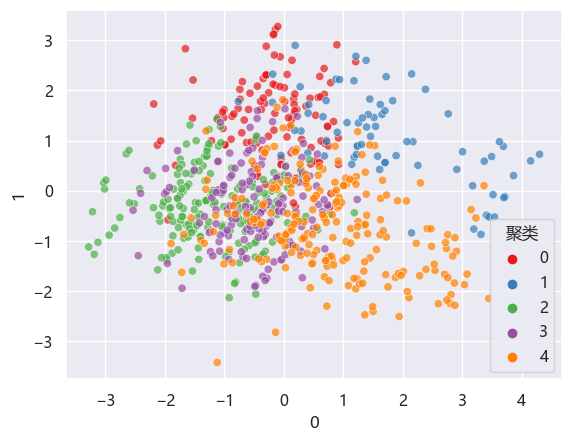

In [3172]:
std = StandardScaler()
pca_cus = pd.DataFrame(std.fit_transform(cus))
pca_cus['聚类'] = labels
pca = PCA(n_components=3, random_state=42)
test = pca.fit_transform(pca_cus.loc[:, pca_cus.columns != '聚类'])
print(sum(pca.explained_variance_ratio_))
test = pd.DataFrame(test)
test['聚类'] = pca_cus['聚类'].astype(str)
test = test.sample(750, random_state=42)
test.sort_values(by='聚类', inplace=True)
sns.scatterplot(data = test, x=0, y=1, hue='聚类', alpha=.7, palette='Set1')

In [3173]:
fig = px.scatter_3d(test, x=0, y=1, z=2, color='聚类')
fig.update_traces(marker={'size': 4})
fig.update_layout(autosize=False, height=800, width=800)
fig.show()

In [3178]:
df1 = pd.read_csv('新客户信息.csv')
df1['年收入log'] = np.log(df1['年收入'])
df1['开户时长'] = np.floor(df1['开户时长'] / 12)
new_cus = df1[['雇员关系',
               '性别',
               '年龄层级',
               '客户状态',
               '是否外国人',
               '省份名称',
               '年收入log',
               '客户等级']]
new_cus = encoder.fit_transform(new_cus)

In [3175]:
old_cus = cus[['雇员关系',
               '性别',
               '年龄层级',
               '客户状态',
               '是否外国人',
               '省份名称',
               '年收入log',
               '客户等级']]
n = 8
old_km = KMeans(n_clusters=n, random_state=42).fit(cus)
old_labels = old_km.labels_

In [3180]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(old_cus, old_labels);
new_label = knn.predict(new_cus)

In [3179]:
df['聚类'] = old_labels
old_pref = df.groupby('聚类').agg({'金融衍生品': sum,
                                   '工资账户': sum,
                                   '高级个人账户': sum,
                                   '个人账户': sum,
                                   '尊享个人账户': sum,
                                   '短期存款': sum,
                                   '中期存款': sum,
                                   '长期存款': sum,
                                   '基金': sum,
                                   '抵押贷款': sum,
                                   '养老金': sum,
                                   '小额贷款': sum,
                                   '信用卡': sum,
                                   '证券': sum})
new_recom = []
for i in range(n):
    pro = pref.iloc[i, :]\
        .sort_values(ascending=False)\
        .to_frame(name='计数')\
        .reset_index(names=['产品'])
    pro = pro[pro['计数'] > 0]
    new_recom.append(pro['产品'].to_list())

For n_clusters = 5 The average silhouette_score is : 0.45999991662648415


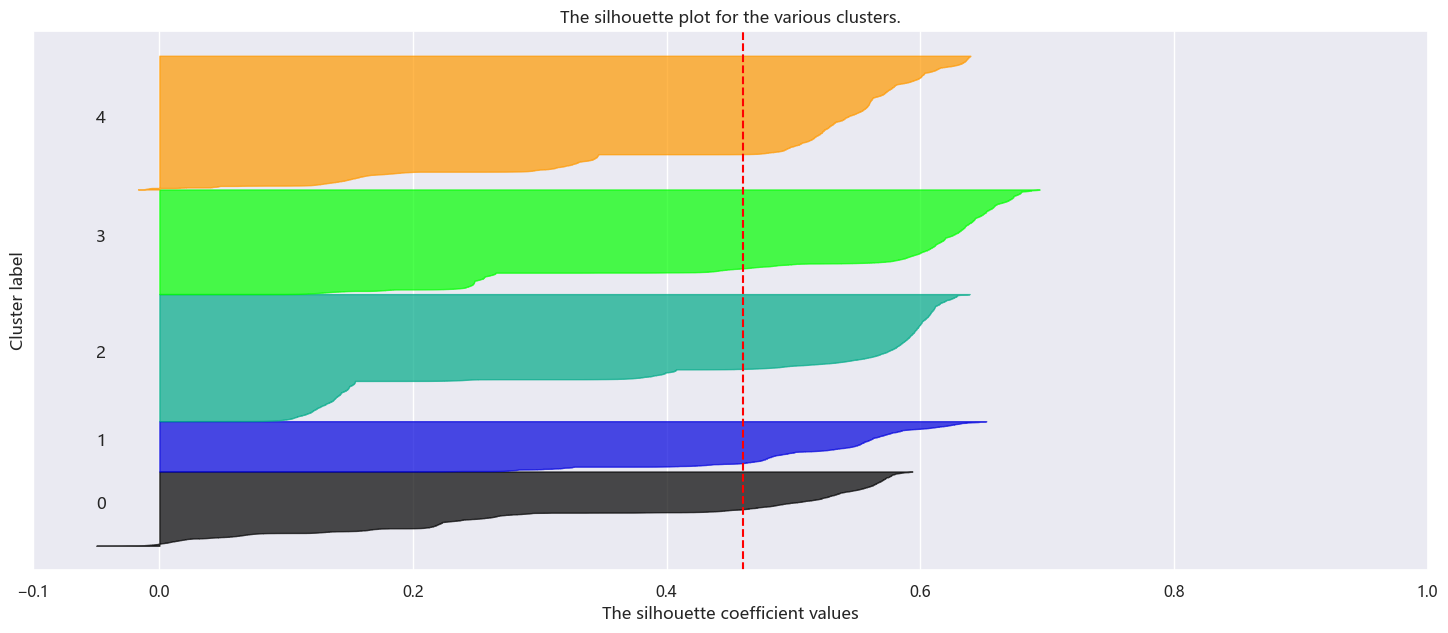

In [2958]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(old_cus, labels)
print(
    "For n_clusters =",
    n,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(old_cus, labels)

y_lower = 10
for i in range(n):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [2895]:
a = 0.2
sum(sample_silhouette_values > a)

69636

In [2810]:
old_cus['dis'] = sample_silhouette_values
old_cus = old_cus[old_cus.dis > a]
old_cus.drop(columns=['dis'], inplace=True)
df['dis'] = sample_silhouette_values
df = df[df.dis > a]
df.drop(columns=['dis'], inplace=True)